# 9 Clustering 

In [539]:
import pandas as pd
import numpy as np
from sklearn.cluster import DBSCAN
import sklearn
%matplotlib notebook
import matplotlib.pyplot as plt
import seaborn
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['font.size'] = 14

## 1. DBSCAN
Using DBSCAN iterate (for-loop) through different values of `min_samples` (1 to 10) and `epsilon` (.05 to .5, in steps of .01)  to find clusters in the road-data used in the Lesson and calculate the Silohouette Coeff for `min_samples` and `epsilon`. Plot **_one_** line plot with the multiple lines generated from the min_samples and epsilon values. Use a 2D array to store the SilCoeff values, one dimension represents `min_samples`, the other represents epsilon.

In [540]:
X = pd.read_csv('../data/3D_spatial_network.txt.gz', header=None, names=['osm', 'lat','lon','alt'])
X = X.drop(['osm'], axis=1).sample(10000)
X.head()

,lat,lon,alt
297157,9.956601,57.581657,28.943128
70223,10.289415,57.178727,32.581608
200894,9.949379,57.003792,30.812583
306552,10.202987,57.409119,42.638997
105989,10.266379,57.191589,55.103019


In [541]:
XX = X.copy()
XX['alt'] = (X.alt - X.alt.mean())/X.alt.std()
XX['lat'] = (X.lat - X.lat.mean())/X.lat.std()
XX['lon'] = (X.lon - X.lon.mean())/X.lon.std()

In [542]:
a = np.zeros((10, 46))
rows = np.arange(1, 11, 1)
cols = np.arange(.05, .51, .01)

df = pd.DataFrame(a, index=rows, columns=cols)

for min_samples in np.arange(1, 11, 1):
    for eps in np.arange(.05, .51, .01):
        dbscan = DBSCAN(eps = eps, min_samples = min_samples)
        XX.cluster = dbscan.fit_predict(XX[['lat','lon', 'alt']])
        df.loc[min_samples, eps] = sklearn.metrics.silhouette_score(XX[['lat','lon', 'alt']], XX.cluster)

C:\Users\Ben\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  # Remove the CWD from sys.path while we load stuff.


<IPython.core.display.Javascript object>


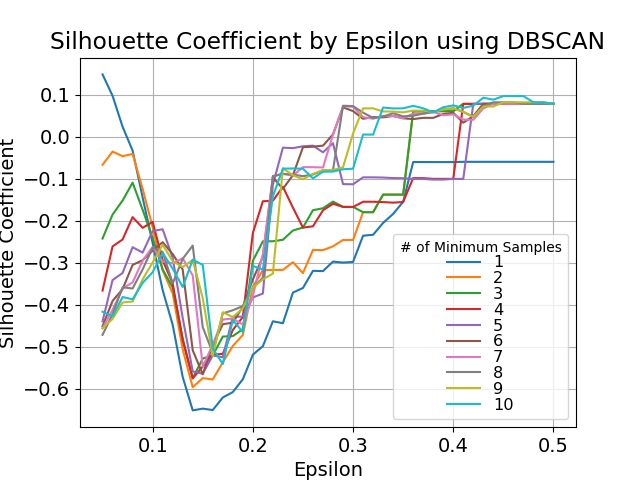

In [576]:
plt.figure()
for i in np.arange(1, 11, 1):
    plt.plot(df.loc[i,:])
        
plt.xlabel('Epsilon')
plt.ylabel('Silhouette Coefficient')
plt.legend(df.index, title = "# of Minimum Samples",  title_fontsize = 10, fontsize = 'small', labelspacing = .05)
plt.title("Silhouette Coefficient by Epsilon using DBSCAN")
plt.grid(True)
plt.show()

## 2. Clustering your own data
Using your own data, find relevant clusters/groups within your data. If your data is labeled already, with a class that you are attempting to predict, be sure to not use it in fitting/training/predicting. 

You may use the labels to compare with predictions to show how well the clustering performed using one of the clustering metrics (http://scikit-learn.org/stable/modules/clustering.html#clustering-performance-evaluation). 

If you don't have labels, use the silhouette coefficient to show performance. Find the optimal fit for your data but you don't need to be as exhaustive as above.

Additionally, show the clusters in 2D and 3D plots. 

For bonus, try using PCA first to condense your data from N columns to less than N.

Two items are expected: 
- Metric Evaluation Plot
- Plots of the clustered data

## K-Means Clustering on UCI Wine data
https://archive.ics.uci.edu/ml/datasets/wine+quality

In [577]:
from sklearn import decomposition
from sklearn import datasets

### Import Data

In [578]:
wine = pd.read_csv("../data/wine.data", 
                  names = ['Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols', 
                           'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue', 
                           'OD280/OD315 of diluted wines','Proline'])

wine.head()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


### Normalize Data and Run PCA (3 columns)

In [579]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
wine_scaled = scaler.fit_transform(wine)

In [580]:
pca = decomposition.PCA(n_components=3)
pca.fit_transform
pca.fit(wine_scaled)
wine_3col = pca.transform(wine_scaled)

wine_3col = pd.DataFrame(wine_3col)
wine_3col['class'] = wine.index

wine_3col.head()

,0,1,2,class
0,3.316751,-1.443463,-0.165739,1
1,2.209465,0.333393,-2.026457,1
2,2.516740,-1.031151,0.982819,1
3,3.757066,-2.756372,-0.176192,1
4,1.008908,-0.869831,2.026688,1


In [581]:
pca = decomposition.PCA(n_components=2)
pca.fit_transform
pca.fit(wine_scaled)
wine_2col = pca.transform(wine_scaled)

wine_2col = pd.DataFrame(wine_2col)
wine_2col['class'] = wine.index

wine_2col.head()

,0,1,class
0,3.316751,-1.443463,1
1,2.209465,0.333393,1
2,2.516740,-1.031151,1
3,3.757066,-2.756372,1
4,1.008908,-0.869831,1


### 3D of Plot Data with True Labels

<IPython.core.display.Javascript object>


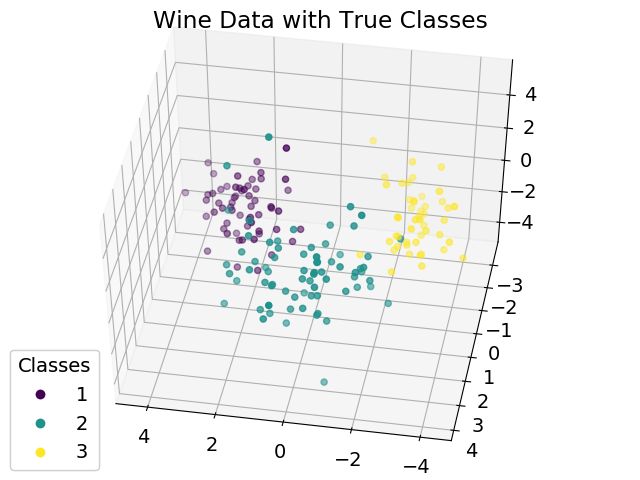

In [582]:
fig = plt.figure()
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=100)

plt.cla()


scatter = ax.scatter(wine_3col[0],wine_3col[1], wine_3col[2], c = wine_3col['class'])
fig.suptitle('Wine Data with True Classes')

legend1 = ax.legend(*scatter.legend_elements(),
                    loc="lower left", title="Classes")
ax.add_artist(legend1)

plt.show()

<IPython.core.display.Javascript object>


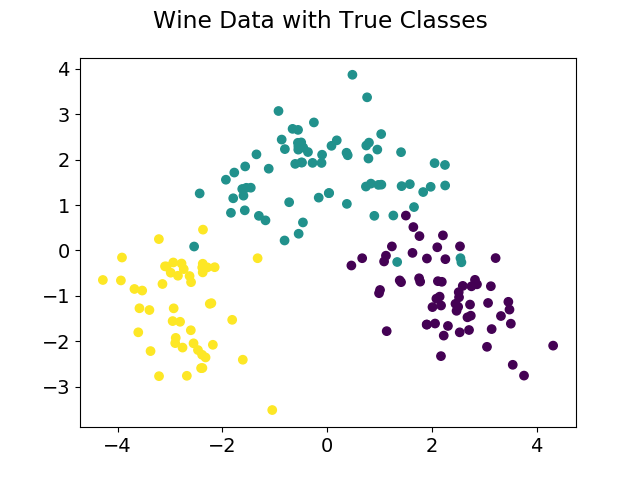

In [583]:
fig = plt.figure()
plt.scatter (wine_2col[0],wine_2col[1], c = wine_2col['class'])
fig.suptitle('Wine Data with True Classes')

plt.show()

### Run K-Means with 3 clusters (3 column data)

In [584]:
# K-means with N clusters
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3, random_state=1)
km.fit(wine_3col.drop(columns = 'class'))

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=1, tol=0.0001, verbose=0)

In [585]:
wine_3col['prediction'] = km.predict(wine_3col.drop(columns = 'class'))
wine_3col['prediction'] = wine_3col['prediction']

<IPython.core.display.Javascript object>


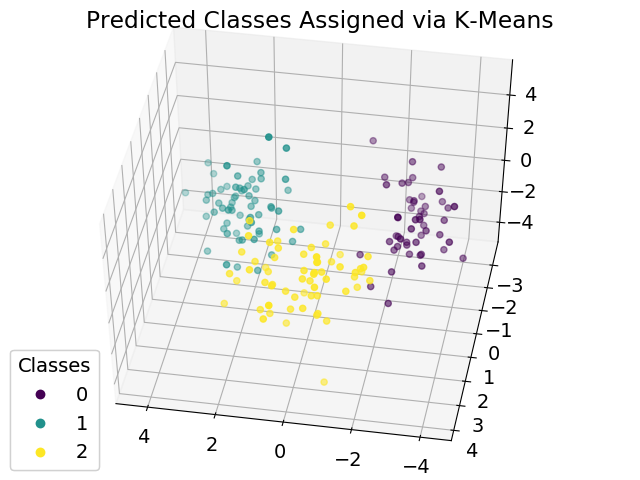

In [586]:
fig = plt.figure()
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=100)

plt.cla()

scatter = ax.scatter(wine_3col[0],wine_3col[1], wine_3col[2], c = wine_3col['prediction'])
fig.suptitle('Predicted Classes Assigned via K-Means')

legend1 = ax.legend(*scatter.legend_elements(),
                    loc="lower left", title="Classes")
ax.add_artist(legend1)

plt.show()

### Run K-means on 2 column data

In [561]:
# K-means with N clusters
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3, random_state=1)
km.fit(wine_2col.drop(columns = 'class'))

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=1, tol=0.0001, verbose=0)

In [587]:
wine_2col['prediction'] = km.predict(wine_2col.drop(columns = 'class'))
wine_2col['prediction'] = wine_2col['prediction']

ValueError: Incorrect number of features. Got 2 features, expected 3

<IPython.core.display.Javascript object>


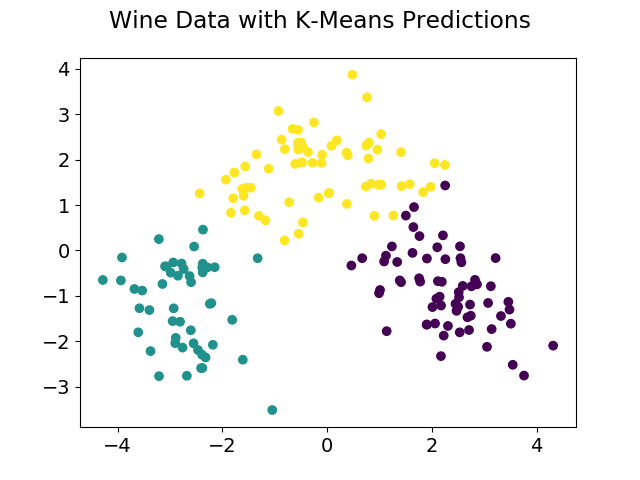

In [565]:
fig = plt.figure()
plt.scatter (wine_2col[0],wine_2col[1], c = wine_2col['prediction'])
fig.suptitle('Wine Data with K-Means Predictions')
plt.show()

### K-Means Performance (3 column) Against True Class Labels

In [ ]:
from sklearn import metrics

labels_true = wine_3col['class']
labels_pred = wine_3col['prediction']

print("Rand Score: ", metrics.adjusted_rand_score(labels_true, labels_pred))
print("Mutal Info Score: ", metrics.adjusted_mutual_info_score(labels_true, labels_pred))
print("Homogeneity Score: ", metrics.homogeneity_score(labels_true, labels_pred))
print("Completeness Score: ", metrics.completeness_score(labels_true, labels_pred))
print("V Measure Score: ", metrics.v_measure_score(labels_true, labels_pred))
print("Fowlkes-Mallows Score: ", metrics.fowlkes_mallows_score(labels_true, labels_pred))

### K-Means Performance (2 column) Against True Class Labels

In [588]:
from sklearn import metrics

labels_true = wine_2col['class']
labels_pred = wine_2col['prediction']

print("Rand Score: ", metrics.adjusted_rand_score(labels_true, labels_pred))
print("Mutal Info Score: ", metrics.adjusted_mutual_info_score(labels_true, labels_pred))
print("Homogeneity Score: ", metrics.homogeneity_score(labels_true, labels_pred))
print("Completeness Score: ", metrics.completeness_score(labels_true, labels_pred))
print("V Measure Score: ", metrics.v_measure_score(labels_true, labels_pred))
print("Fowlkes-Mallows Score: ", metrics.fowlkes_mallows_score(labels_true, labels_pred))

KeyError: 'prediction'

###  Run K Means with different cluster sizes (3 column data)

In [589]:
wine_scores_3d = np.zeros(9)
wine_scores_3d = pd.DataFrame(wine_scores_3d, index=np.arange(2,11))

In [590]:
from sklearn.cluster import KMeans
for n in np.arange(2,11):
    km = KMeans(n_clusters=n, random_state=1)
    km.fit(wine_3col.drop(columns = 'class'))
    wine_3col['cluster'] = km.predict(wine_3col.drop(columns = 'class'))
    wine_scores_3d.loc[n] = sklearn.metrics.silhouette_score(wine_3col.drop(columns = ['class', 'cluster']), wine_3col['cluster'])
    

<IPython.core.display.Javascript object>


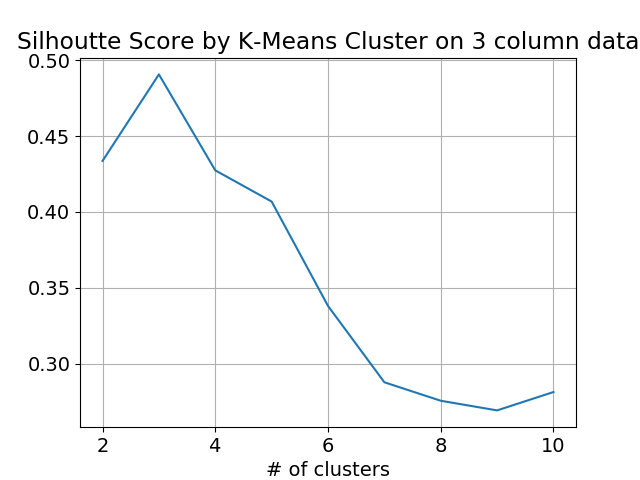

In [591]:
plt.figure()
plt.plot(wine_scores_3d)
plt.title("Silhoutte Score by K-Means Cluster on 3 column data")
plt.xlabel("# of clusters")
plt.grid(True)
plt.show()

###  Run K Means with different cluster sizes (2 column data)

In [592]:
wine_scores_2d = np.zeros(9)
wine_scores_2d = pd.DataFrame(wine_scores_2d, index=np.arange(2,11))

In [593]:
from sklearn.cluster import KMeans
for n in np.arange(2,11):
    km = KMeans(n_clusters=n, random_state=1)
    km.fit(wine_2col.drop(columns = 'class'))
    wine_2col['cluster'] = km.predict(wine_2col.drop(columns = 'class'))
    wine_scores_2d.loc[n] = sklearn.metrics.silhouette_score(wine_2col.drop(columns = ['class', 'cluster']), wine_2col['cluster'])
    

<IPython.core.display.Javascript object>


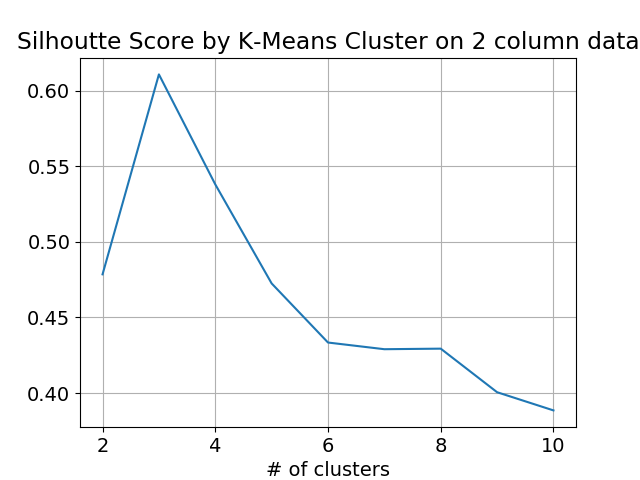

In [573]:
plt.figure()
plt.plot(wine_scores_2d)
plt.title("Silhoutte Score by K-Means Cluster on 2 column data")
plt.xlabel("# of clusters")
plt.grid(True)
plt.show()

## Note
You may use any for both parts 1 and 2, I only recommend using the data I used in the Lesson for part 1. I've included several new datasets in the `data/` folder, such as `beers.csv`, `snow_tweets.csv`, `data/USCensus1990.data.txt.gz`. You do not need to unzip or ungzip any data files. Pandas can open these files on its own.